# Data Visualization With Python

## Libraries

In [56]:
# Libraries for data analysis and visualization :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data and checking the information

In [57]:
# Importing the dataset :
df = pd.read_csv('/Users/adel/Desktop/Final_project_Flow/GITHUB/Mysql Extracts/merged_dataset_final.csv')
df.head()

,Datetime,date,Year,Month,Day,Hour,Weekday,Consumption (MW),Fuel oil (MW),Coal (MW),...,CO2 emissions intensity (g/kWh),Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW),Flag Holiday,Average temperature (°C),Reference temperature (°C),Temperature Deviation (°C)
0,2012-01-01 00:00:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
1,2012-01-01 00:30:00,2012-01-01,2012,1,1,0,6,58315,492,25,...,33,-1750,-1200,-862,-2625,-2940,1,11.7,4.6,7.1
2,2012-01-01 01:00:00,2012-01-01,2012,1,1,1,6,56231,492,25,...,34,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
3,2012-01-01 01:30:00,2012-01-01,2012,1,1,1,6,56075,491,25,...,35,-1750,-1400,-862,-2625,-2714,1,11.7,4.6,7.1
4,2012-01-01 02:00:00,2012-01-01,2012,1,1,2,6,55532,492,25,...,35,-1750,-1400,-862,-2327,-1088,1,11.7,4.6,7.1


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182592 entries, 0 to 182591
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Datetime                           182592 non-null  object 
 1   date                               182592 non-null  object 
 2   Year                               182592 non-null  int64  
 3   Month                              182592 non-null  int64  
 4   Day                                182592 non-null  int64  
 5   Hour                               182592 non-null  int64  
 6   Weekday                            182592 non-null  int64  
 7   Consumption (MW)                   182592 non-null  int64  
 8   Fuel oil (MW)                      182592 non-null  int64  
 9   Coal (MW)                          182592 non-null  int64  
 10  Gas (MW)                           182592 non-null  int64  
 11  Nuclear (MW)                       1825

Datetime and date are in object format so let's fix this.

In [59]:
# Changing the type of the column 'Datetime' to datetime and the column 'Date' to date :
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['date'] = pd.to_datetime(df['date'])

## Data Analysis

Text(0.5, 1.0, 'Boxplot of the Energy Consumption by Year')

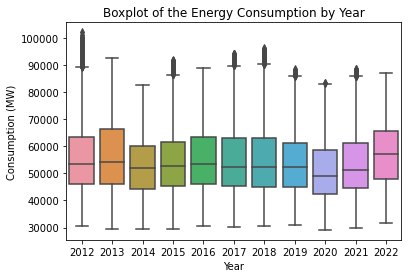

In [62]:
# Boxplot of the consumption column by year :
sns.boxplot(x=df['Year'], y=df['Consumption (MW)']).set_title('Boxplot of the Energy Consumption by Year')

Text(0.5, 1.0, 'Boxplot of the Energy Consumption by Month')

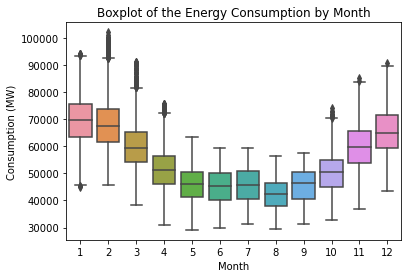

In [63]:
# Boxplot of the consumption column by month :

sns.boxplot(x=df['Month'], y=df['Consumption (MW)']).set_title('Boxplot of the Energy Consumption by Month')

Text(0.5, 1.0, 'Boxplot of the Energy Consumption by Hour')

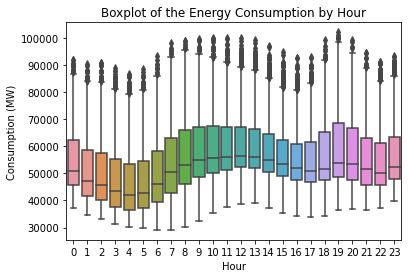

In [64]:
# Boxplot of the consumption column by Hour :
sns.boxplot(x=df['Hour'], y=df['Consumption (MW)']).set_title('Boxplot of the Energy Consumption by Hour')

Text(0.5, 1.0, 'Boxplot of the Energy Consumption by Weekday')

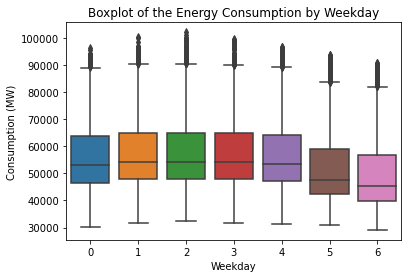

In [65]:
# Boxplot of the consumption column by Day of the week :
sns.boxplot(x=df['Weekday'], y=df['Consumption (MW)']).set_title('Boxplot of the Energy Consumption by Weekday')

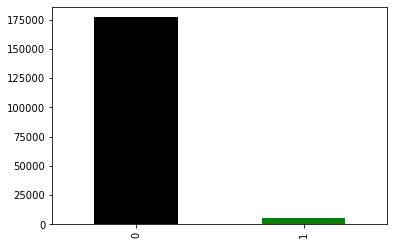

In [15]:
# Ploting the number of rows with 'Flag Holiday' is 1 and 0 :
df['Flag Holiday'].value_counts().plot(kind='bar', color=['black', 'green'])

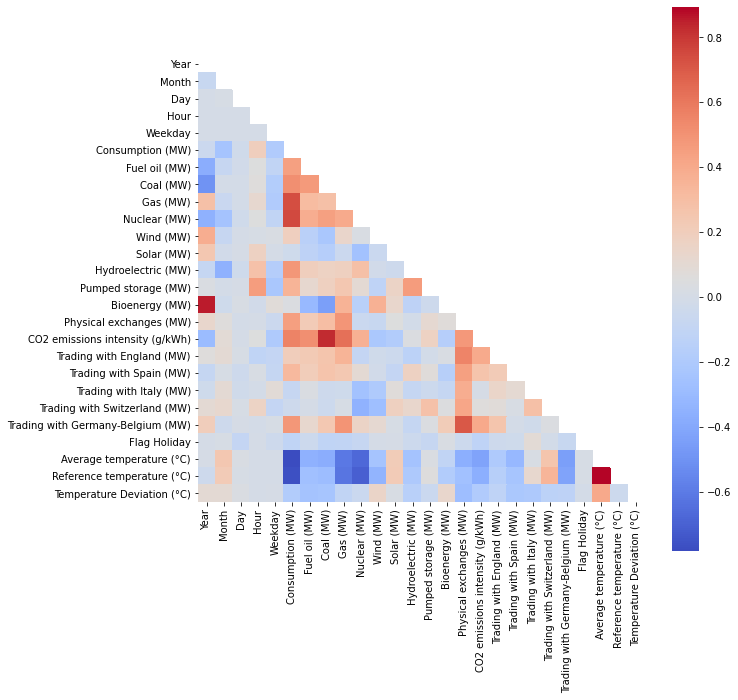

In [68]:
# Creating correlation matrix
corr = df.corr()

# Creating a mask to hide the upper triangle of the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Creating figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Creating heatmap with the masked upper triangle
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', square=True, ax=ax)

# Showing the plot
plt.show()


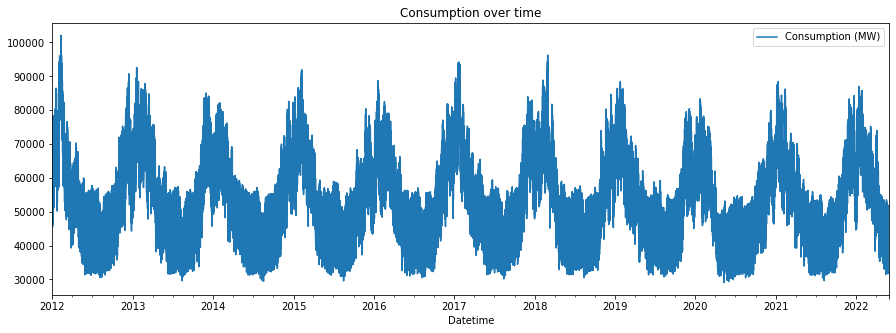

In [69]:
# Ploting the consumption over datetime :

df.plot(x='Datetime', y='Consumption (MW)', figsize=(15,5), title='Consumption over time')


### Mean Energy Production Sources Over the Time

In [71]:
# Comparing power consumption and generation from different sources over time :
# Select the columns of interest
columns_of_interest = ['Coal (MW)', 'Gas (MW)', 'Nuclear (MW)', 'Wind (MW)','Fuel oil (MW)','Solar (MW)','Hydroelectric (MW)','Bioenergy (MW)']

# Group the data by datetime and sum the values for each source
grouped_data = df.groupby('Year')[columns_of_interest].mean()

In [72]:
grouped_data

,Coal (MW),Gas (MW),Nuclear (MW),Wind (MW),Fuel oil (MW),Solar (MW),Hydroelectric (MW),Bioenergy (MW)
Year,,,,,,,,
2012,1986.088627,2850.610087,46055.824055,1696.574909,517.325421,430.647826,7213.283982,664.441940
2013,2251.810674,2282.786530,46058.161187,1816.476998,453.909532,519.007648,8521.734532,707.971404
2014,949.288813,1627.784247,47432.006963,1947.371518,272.259132,664.258790,7689.527283,857.309703
2015,982.869806,2522.096119,47540.450628,2408.021461,302.985103,831.773231,6680.557021,903.688699
2016,831.306979,4026.467327,43682.177482,2381.362990,196.101719,940.439492,7213.065403,991.730988
2017,1111.329110,4513.795091,43251.853710,2750.864726,397.094521,1026.673402,6051.790297,1077.468893
2018,656.297146,3446.567352,44861.127055,3211.287557,234.531164,1208.082477,7695.196404,1089.724030
2019,177.469178,4238.559189,43291.063584,3860.281450,273.301199,1381.526370,6792.481621,1102.820320
2020,155.164845,3924.005806,38161.204463,4519.613274,105.552653,1418.376594,7377.761384,1101.854167


In [73]:
# Checking the number of negative values in the column 'Coal (MW)' :
df[df['Coal (MW)'] < 0].shape

(14680, 28)

It seems that we have negative values in the column 'Coal (MW)' wich it does not make sens. So let's replace these values by 0.

In [74]:
# Replace negative values with zero
df[columns_of_interest] = df[columns_of_interest].clip(lower=0)

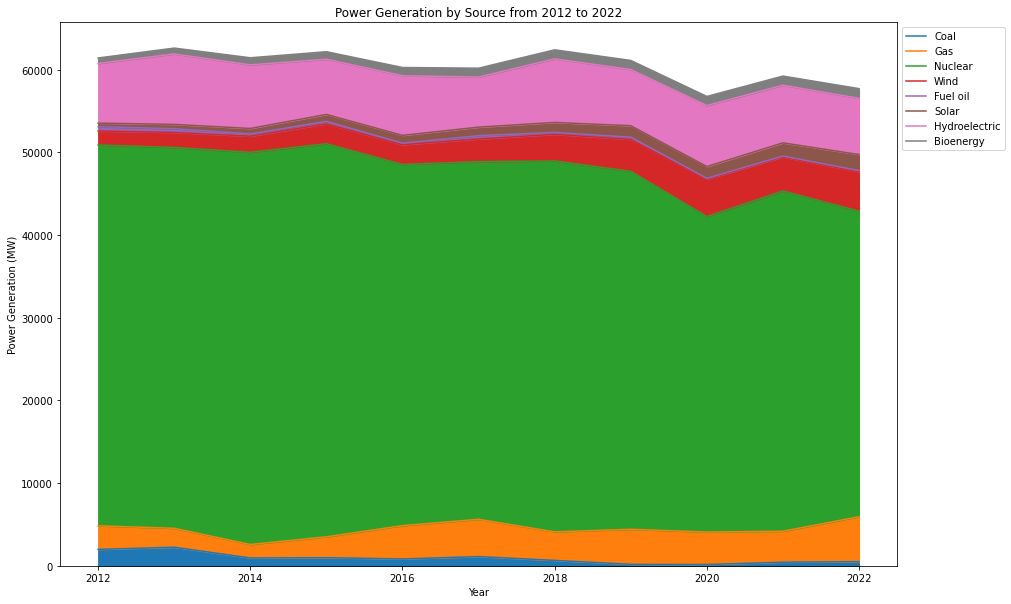

In [76]:
# Define colors and legend labels
labels = ['Coal', 'Gas', 'Nuclear', 'Wind', 'Fuel oil', 'Solar', 'Hydroelectric', 'Bioenergy']

# Create an area plot of the data
ax = grouped_data.plot.area(figsize=(15, 10))

# Create a title
ax.set_title('Power Generation by Source from 2012 to 2022')

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Power Generation (MW)')

# Add the legend
ax.legend(labels=labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [77]:
# Comparing power consumption and generation from different sources over time :
# Select the columns of interest
columns_of_interest = ['Coal (MW)', 'Gas (MW)', 'Nuclear (MW)', 'Wind (MW)','Fuel oil (MW)','Solar (MW)','Hydroelectric (MW)','Bioenergy (MW)']

# Group the data by datetime and sum the values for each source
grouped_data_hour = df.groupby('Hour')[columns_of_interest].mean()

In [78]:
grouped_data_hour

,Coal (MW),Gas (MW),Nuclear (MW),Wind (MW),Fuel oil (MW),Solar (MW),Hydroelectric (MW),Bioenergy (MW)
Hour,,,,,,,,
0,892.169164,3181.027865,43966.656151,3133.047319,257.768270,0.297187,6930.841746,980.246714
1,772.445058,2803.919690,43369.050999,3092.806257,243.486199,0.272739,5877.792455,981.555862
2,744.964511,2742.814537,43247.375394,3041.130126,240.437303,0.233438,5607.935988,982.504075
3,692.970952,2659.113170,42696.825315,2989.166930,237.743954,0.224238,5277.449527,982.879469
4,677.054679,2625.994611,42509.323081,2941.465037,237.052576,0.214511,5120.124606,982.616851
5,723.289169,2719.842140,42727.555994,2906.106598,242.484227,0.229627,5181.957019,979.395110
6,845.486067,3023.394585,43294.367376,2885.648659,254.648265,2.585962,5653.950710,972.775368
7,967.121188,3436.425342,43824.468060,2882.880258,274.374474,65.171267,6988.614485,967.705967
8,1017.491062,3657.166009,44109.959385,2812.475289,294.937171,383.797713,8112.778785,963.543638


In [79]:
# Replace negative values with zero
df[columns_of_interest] = df[columns_of_interest].clip(lower=0)

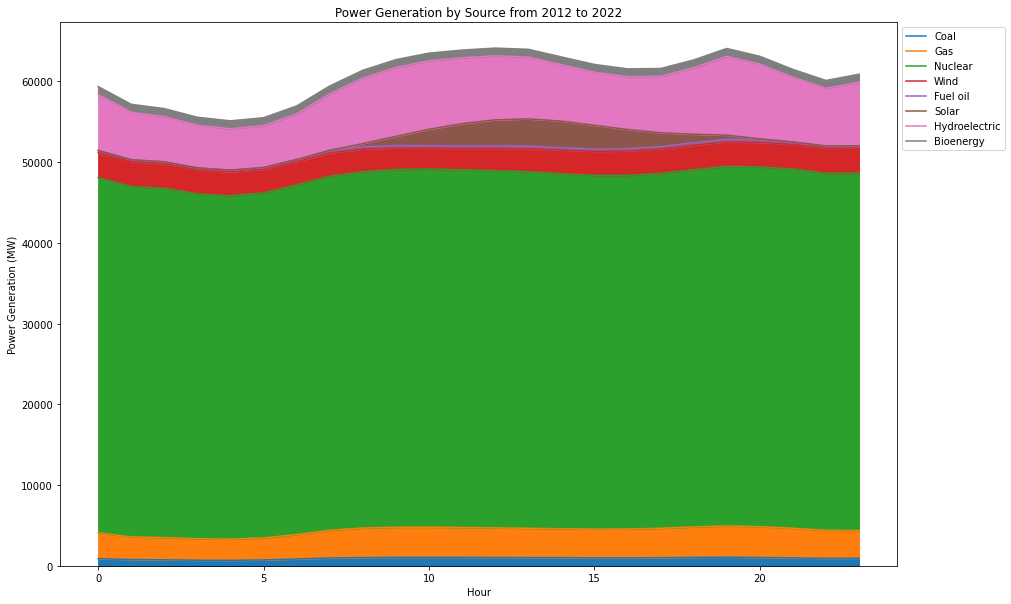

In [80]:
# Define colors and legend labels
labels = ['Coal', 'Gas', 'Nuclear', 'Wind', 'Fuel oil', 'Solar', 'Hydroelectric', 'Bioenergy']

# Create an area plot of the data
ax = grouped_data_hour.plot.area(figsize=(15, 10))

# Create a title
ax.set_title('Power Generation by Source from 2012 to 2022')

# Set the x-axis label
ax.set_xlabel('Hour')

# Set the y-axis label
ax.set_ylabel('Power Generation (MW)')

# Add the legend
ax.legend(labels=labels, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

### Physical Exchanges of Power With Different Countries

In [21]:
# Comparing power physical exchanges of power with different countries over time :
# Select the columns of interest
exchanges_columns = ['Trading with England (MW)', 'Trading with Spain (MW)', 'Trading with Italy (MW)',
                'Trading with Switzerland (MW)', 'Trading with Germany-Belgium (MW)']

# Group the data by datetime and sum the values for each source
grouped_data_exchanges = df.groupby('Year')[exchanges_columns].mean()

In [22]:
grouped_data_exchanges

,Trading with England (MW),Trading with Spain (MW),Trading with Italy (MW),Trading with Switzerland (MW),Trading with Germany-Belgium (MW)
Year,,,,,
2012,-764.893556,-215.712546,-1718.770947,-2002.461293,-362.145036
2013,-1193.336416,-194.915525,-1752.959475,-1905.878196,-351.863927
2014,-1739.375685,-408.348973,-2203.860959,-1926.851826,-1211.397374
2015,-1610.664041,-841.408904,-2252.478082,-1599.785388,-765.564726
2016,-1141.866405,-888.694900,-1880.573315,-1153.621015,609.619706
2017,-908.991267,-1422.643607,-2072.381393,-1176.666153,1247.046347
2018,-1482.690297,-1374.223744,-2116.288128,-1208.811701,-694.755137
2019,-1284.430251,-1107.997831,-2155.255594,-1499.997774,-309.610674
2020,-1000.919000,-597.808629,-1751.445469,-1501.053677,-69.963570


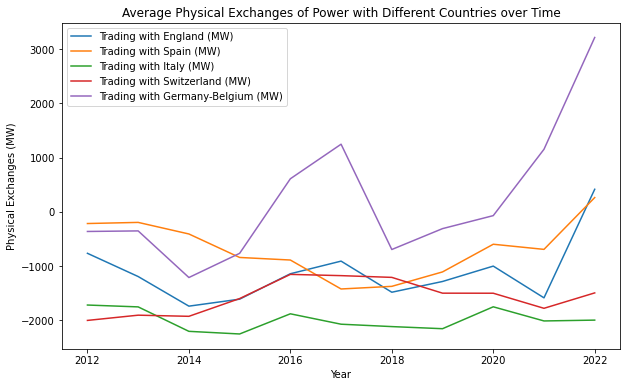

In [23]:
# Create a line plot of the data
fig, ax = plt.subplots(figsize=(10,6))
grouped_data_exchanges.plot(ax=ax)

# Add labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Physical Exchanges (MW)')
ax.set_title('Average Physical Exchanges of Power with Different Countries over Time')

# Display the plot
plt.show()


In [ ]:
# Comparing power physical exchanges of power with different countries over time :
# Select the columns of interest
exchanges_columns = ['Trading with England (MW)', 'Trading with Spain (MW)', 'Trading with Italy (MW)',
                'Trading with Switzerland (MW)', 'Trading with Germany-Belgium (MW)']

# Group the data by datetime and sum the values for each source
grouped_data_exchanges = df.groupby('Year')[exchanges_columns].mean()

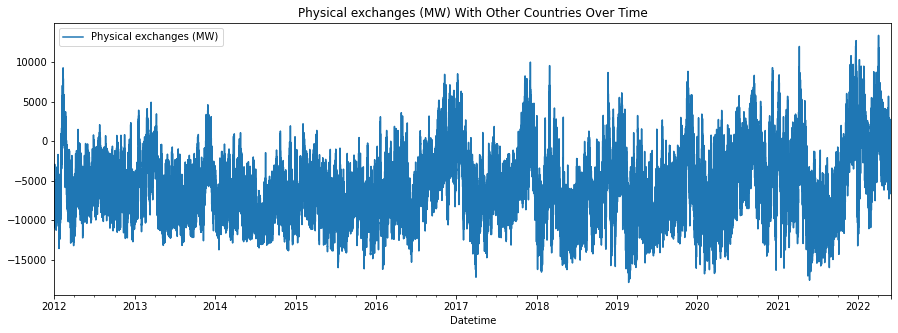

In [28]:
# Ploting the column 'Physical exchanges (MW)' over datetime :

df.plot(x='Datetime', y='Physical exchanges (MW)', title='Physical exchanges (MW) With Other Countries Over Time', figsize=(15,5))

In [30]:
# Group the data of the column 'Physical exchanges (MW)' by Year and sum the values :

grouped_data_pe = df.groupby('Year')['Physical exchanges (MW)'].mean()

In [31]:
grouped_data_pe

Year
2012   -5253.993682
2013   -5606.884817
2014   -7747.767409
2015   -7372.745205
2016   -4811.041154
2017   -4677.953824
2018   -7274.784247
2019   -6675.656107
2020   -5210.022199
2021   -5207.017466
2022      88.420944
Name: Physical exchanges (MW), dtype: float64

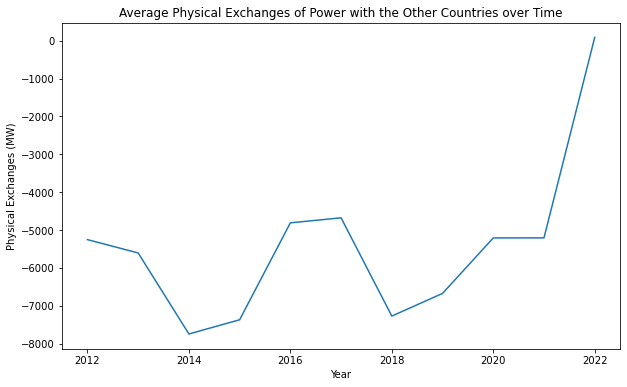

In [32]:
# Create a line plot of the data
fig, ax = plt.subplots(figsize=(10,6))
grouped_data_pe.plot(ax=ax)

# Add labels and titles
ax.set_xlabel('Year')
ax.set_ylabel('Physical Exchanges (MW)')
ax.set_title('Average Physical Exchanges of Power with the Other Countries over Time')

# Display the plot
plt.show()

### Temperature and Power Consumption

Analyzing the relationship between temperature and power consumption. This can help to understand the effect of weather on power demand.

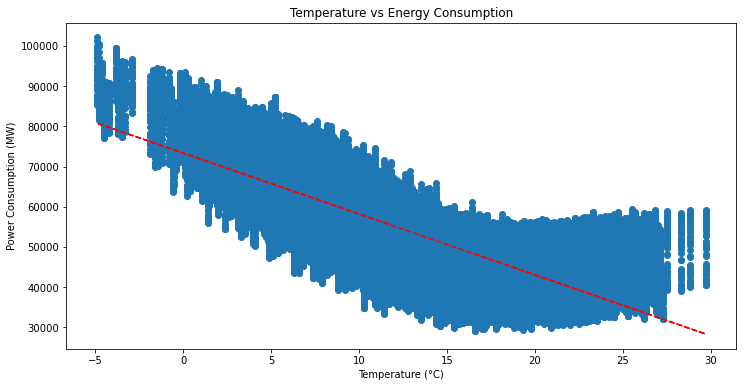

In [47]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Average temperature (°C)'], df['Consumption (MW)'])
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Temperature (°C)')
plt.ylabel('Power Consumption (MW)')

# Add a trendline
z = np.polyfit(df['Average temperature (°C)'], df['Consumption (MW)'], 1)
p = np.poly1d(z)
plt.plot(df['Average temperature (°C)'], p(df['Average temperature (°C)']), "r--")

plt.show()

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')

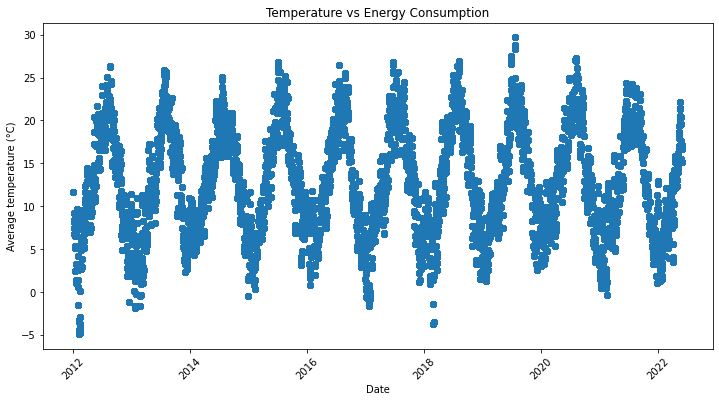

In [20]:
# Plotting 'average temperature (°C)' over 'date' with a trendline :

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['Average temperature (°C)'])
plt.title('Temperature vs Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Average temperature (°C)')
plt.xticks(rotation=45)

# Add a trendline
z = np.polyfit(df['date'], df['Average temperature (°C)'], 1)
p = np.poly1d(z)
plt.plot(df['date'], p(df['date']), "r--")

plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182592 entries, 0 to 182591
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Datetime                           182592 non-null  datetime64[ns]
 1   date                               182592 non-null  datetime64[ns]
 2   Year                               182592 non-null  int64         
 3   Month                              182592 non-null  int64         
 4   Day                                182592 non-null  int64         
 5   Hour                               182592 non-null  int64         
 6   Weekday                            182592 non-null  int64         
 7   Consumption (MW)                   182592 non-null  int64         
 8   Fuel oil (MW)                      182592 non-null  int64         
 9   Coal (MW)                          182592 non-null  int64         
 10  Gas (MW)            

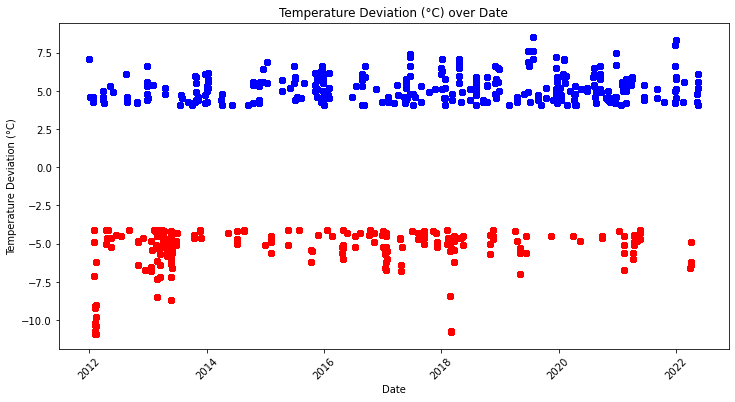

In [85]:
# Plotting  "Temperature Deviation (°C)" over "date" without taking into account the 'Temperature Deviation (°C)' values that are equal to between -2,5 and 2,5 :

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df[df['Temperature Deviation (°C)'] < -4]['date'], df[df['Temperature Deviation (°C)'] < -4]['Temperature Deviation (°C)'], color='red')
plt.scatter(df[df['Temperature Deviation (°C)'] > 4]['date'], df[df['Temperature Deviation (°C)'] > 4]['Temperature Deviation (°C)'], color='blue')
plt.title('Temperature Deviation (°C) over Date')
plt.xlabel('Date')
plt.ylabel('Temperature Deviation (°C)')
plt.xticks(rotation=45)

plt.show()

In [29]:
# Counting the number of data points of  "Temperature Deviation (°C)" over "date" without taking into account the 'Temperature Deviation (°C)' values that are equal to between -2,5 and 2,5 :

df[df['Temperature Deviation (°C)'] < -2.5].shape

(30480, 28)

In [30]:
df[df['Temperature Deviation (°C)'] > 2.5].shape

(37920, 28)

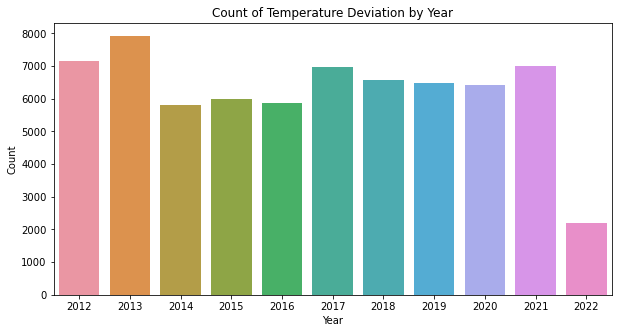

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data to exclude values between -2.5 and 2.5
filtered_data = df[(df['Temperature Deviation (°C)'] > 2.5) | (df['Temperature Deviation (°C)'] < -2.5)]

# Plot count of Temperature Deviation by Year
plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=filtered_data)
plt.title('Count of Temperature Deviation by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


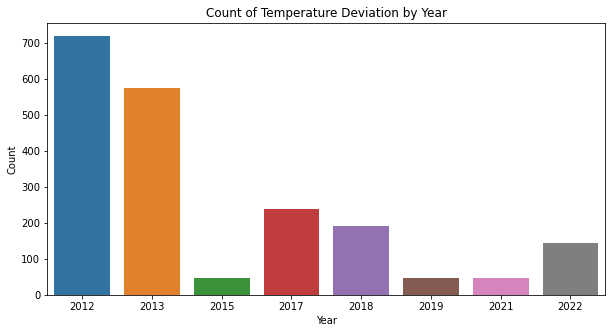

In [47]:
# Filter data to exclude values between -2.5 and 2.5
filtered_data = df[df['Temperature Deviation (°C)'] < -6]

# Plot count of Temperature Deviation by Year
plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=filtered_data)
plt.title('Count of Temperature Deviation by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

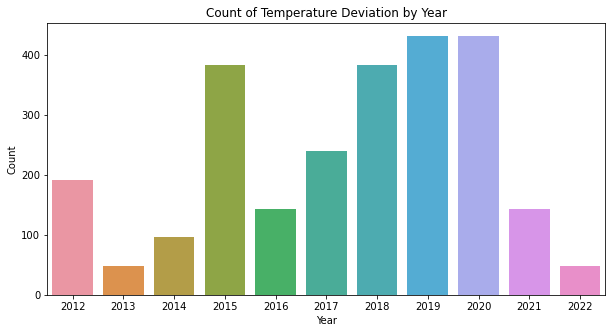

In [44]:
filtered_data = df[df['Temperature Deviation (°C)'] > 6]

# Plot count of Temperature Deviation by Year
plt.figure(figsize=(10,5))
sns.countplot(x='Year', data=filtered_data)
plt.title('Count of Temperature Deviation by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

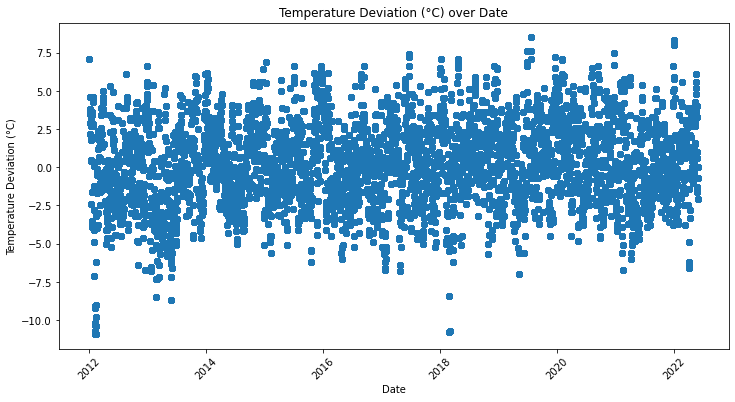

In [26]:
# Plotting  "Temperature Deviation (°C)" over "date" with a trendline :

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['Temperature Deviation (°C)'])
plt.title('Temperature Deviation (°C) over Date')
plt.xlabel('Date')
plt.ylabel('Temperature Deviation (°C)')
plt.xticks(rotation=45)

plt.show()

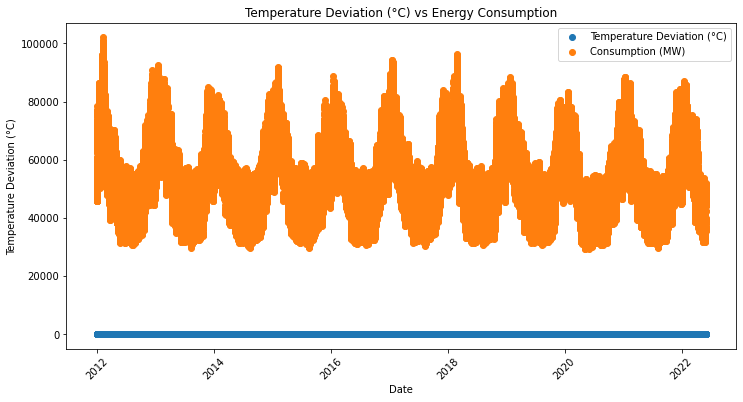

In [24]:
# Plotting the correlation "Temperature Deviation (°C)" and "Consumption (MW)" over "date"  :

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['date'], df['Temperature Deviation (°C)'], label='Temperature Deviation (°C)')
plt.scatter(df['date'], df['Consumption (MW)'], label='Consumption (MW)')
plt.title('Temperature Deviation (°C) vs Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Temperature Deviation (°C)')
plt.xticks(rotation=45)
plt.legend()

plt.show()


### Public Holidays and Power Consumption

Analyzing the effect of public holidays on power consumption. This can help to understand the change in demand during public holidays.

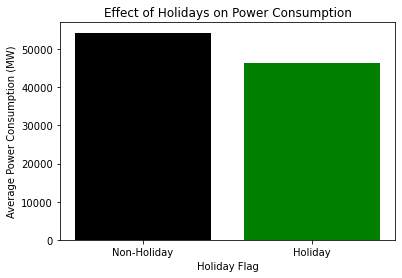

In [59]:
# Group data by holiday flag and calculate average power consumption
grouped_data_holiday = df.groupby('Flag Holiday')['Consumption (MW)'].mean()

# Create a bar plot
plt.bar(['Non-Holiday', 'Holiday'], grouped_data_holiday, color=['black', 'green'])
plt.xlabel('Holiday Flag')
plt.ylabel('Average Power Consumption (MW)')
plt.title('Effect of Holidays on Power Consumption')
plt.show()


### CO2 Emissions

Analyzing the CO2 emissions intensity of power generation. This can help to understand the environmental impact of power generation.

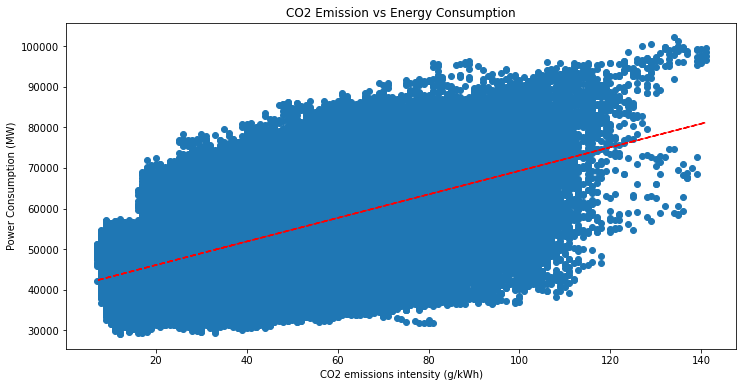

In [63]:
# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['CO2 emissions intensity (g/kWh)'], df['Consumption (MW)'])
plt.title('CO2 Emission vs Energy Consumption')
plt.xlabel('CO2 emissions intensity (g/kWh)')
plt.ylabel('Power Consumption (MW)')

# Add a trendline
z = np.polyfit(df['CO2 emissions intensity (g/kWh)'], df['Consumption (MW)'], 1)
p = np.poly1d(z)
plt.plot(df['CO2 emissions intensity (g/kWh)'], p(df['CO2 emissions intensity (g/kWh)']), "r--")

plt.show()

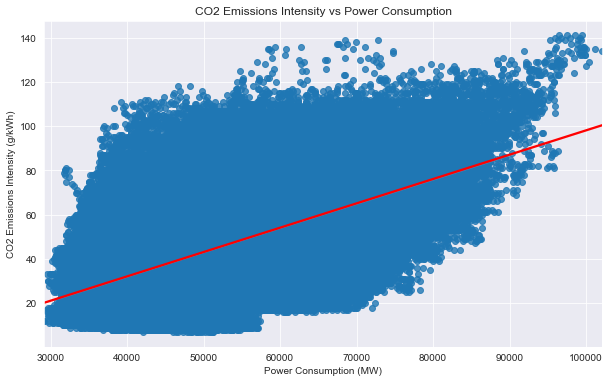

In [68]:
sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.regplot(x="Consumption (MW)", y="CO2 emissions intensity (g/kWh)", data=df, line_kws={"color":"red"})
plt.title("CO2 Emissions Intensity vs Power Consumption")
plt.xlabel("Power Consumption (MW)")
plt.ylabel("CO2 Emissions Intensity (g/kWh)")
plt.show()